<a href="https://colab.research.google.com/github/eRuaro/prac-research/blob/main/iloilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = '/content/drive/MyDrive/prac-research/actual/data/research-data-iloilo.csv'

import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import sklearn

In [2]:
df = pd.read_csv(
    path, 
    low_memory=False,
    parse_dates=['time']
)

df.tail()

,name,region,country,longitude,latitude,time,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
2227,Iloilo,Iloilo City,Philippines,122.56,10.7,2022-03-12 19:00:00,26.7,0,Light rain shower,10.8,27,NNE,1007.09,0.78,87.33,77,30.2,1,80
2228,Iloilo,Iloilo City,Philippines,122.56,10.7,2022-03-12 20:00:00,26.3,0,Light rain shower,11.9,22,NNE,1007.14,0.79,87.27,73,29.7,1,80
2229,Iloilo,Iloilo City,Philippines,122.56,10.7,2022-03-12 21:00:00,26.0,0,Light rain shower,13.0,18,NNE,1007.19,0.81,87.20,69,29.3,0,0
2230,Iloilo,Iloilo City,Philippines,122.56,10.7,2022-03-12 22:00:00,25.9,0,Light rain shower,13.4,17,NNE,1007.97,0.54,85.30,53,29.0,1,80
2231,Iloilo,Iloilo City,Philippines,122.56,10.7,2022-03-12 23:00:00,25.7,0,Clear,13.9,16,NNE,1008.75,0.27,83.40,37,28.7,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               2232 non-null   object        
 1   region             2232 non-null   object        
 2   country            2232 non-null   object        
 3   longitude          2232 non-null   float64       
 4   latitude           2232 non-null   float64       
 5   time               2232 non-null   datetime64[ns]
 6   temp_c             2232 non-null   float64       
 7   is_day             2232 non-null   int64         
 8   condition          2232 non-null   object        
 9   wind_kph           2232 non-null   float64       
 10  wind_degree        2232 non-null   int64         
 11  wind_dir           2232 non-null   object        
 12  air_pressure       2232 non-null   float64       
 13  precipitation      2232 non-null   float64       
 14  relative

In [4]:
df.time.head()

0   2021-12-10 00:00:00
1   2021-12-10 01:00:00
2   2021-12-10 02:00:00
3   2021-12-10 03:00:00
4   2021-12-10 04:00:00
Name: time, dtype: datetime64[ns]

In [5]:
df.sort_values(by=['time'], ascending=True)

df.time.head()

0   2021-12-10 00:00:00
1   2021-12-10 01:00:00
2   2021-12-10 02:00:00
3   2021-12-10 03:00:00
4   2021-12-10 04:00:00
Name: time, dtype: datetime64[ns]

## Feature Engineering

In [6]:
df['year'] = df.time.dt.year
df['month'] = df.time.dt.month
df['day'] = df.time.dt.day
df['hour'] = df.time.dt.hour
df['dayOfWeek'] = df.time.dt.dayofweek

df.head().T

,0,1,2,3,4
name,Iloilo,Iloilo,Iloilo,Iloilo,Iloilo
region,Iloilo City,Iloilo City,Iloilo City,Iloilo City,Iloilo City
country,Philippines,Philippines,Philippines,Philippines,Philippines
longitude,122.56,122.56,122.56,122.56,122.56
latitude,10.7,10.7,10.7,10.7,10.7
time,2021-12-10 00:00:00,2021-12-10 01:00:00,2021-12-10 02:00:00,2021-12-10 03:00:00,2021-12-10 04:00:00
temp_c,24.7,24.7,24.6,24.6,24.6
is_day,0,0,0,0,0
condition,Cloudy,Cloudy,Cloudy,Cloudy,Cloudy
wind_kph,24.8,24.7,24.6,24.5,24.8


In [7]:
df.tail().T

,2227,2228,2229,2230,2231
name,Iloilo,Iloilo,Iloilo,Iloilo,Iloilo
region,Iloilo City,Iloilo City,Iloilo City,Iloilo City,Iloilo City
country,Philippines,Philippines,Philippines,Philippines,Philippines
longitude,122.56,122.56,122.56,122.56,122.56
latitude,10.7,10.7,10.7,10.7,10.7
time,2022-03-12 19:00:00,2022-03-12 20:00:00,2022-03-12 21:00:00,2022-03-12 22:00:00,2022-03-12 23:00:00
temp_c,26.7,26.3,26.0,25.9,25.7
is_day,0,0,0,0,0
condition,Light rain shower,Light rain shower,Light rain shower,Light rain shower,Clear
wind_kph,10.8,11.9,13.0,13.4,13.9


In [8]:
x_time = df['time']
df.drop(columns=['time', 'will_it_rain', 'chance_of_rain'], inplace=True, axis=1)
df.head().T

,0,1,2,3,4
name,Iloilo,Iloilo,Iloilo,Iloilo,Iloilo
region,Iloilo City,Iloilo City,Iloilo City,Iloilo City,Iloilo City
country,Philippines,Philippines,Philippines,Philippines,Philippines
longitude,122.56,122.56,122.56,122.56,122.56
latitude,10.7,10.7,10.7,10.7,10.7
temp_c,24.7,24.7,24.6,24.6,24.6
is_day,0,0,0,0,0
condition,Cloudy,Cloudy,Cloudy,Cloudy,Cloudy
wind_kph,24.8,24.7,24.6,24.5,24.8
wind_degree,22,22,22,23,22


## Model driven EDA

In [9]:
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor(
    n_jobs=1,
    random_state=42
)

### Turning data into pandas categories

In [10]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

name
region
country
condition
wind_dir


In [11]:
for label, content in df.items(): 
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               2232 non-null   category
 1   region             2232 non-null   category
 2   country            2232 non-null   category
 3   longitude          2232 non-null   float64 
 4   latitude           2232 non-null   float64 
 5   temp_c             2232 non-null   float64 
 6   is_day             2232 non-null   int64   
 7   condition          2232 non-null   category
 8   wind_kph           2232 non-null   float64 
 9   wind_degree        2232 non-null   int64   
 10  wind_dir           2232 non-null   category
 11  air_pressure       2232 non-null   float64 
 12  precipitation      2232 non-null   float64 
 13  relative_humidity  2232 non-null   float64 
 14  cloud              2232 non-null   int64   
 15  feelslike_c        2232 non-null   float64 
 16  year  

In [13]:
print(f'{df.isnull().sum() / len(df) * 100}%')

name                 0.0
region               0.0
country              0.0
longitude            0.0
latitude             0.0
temp_c               0.0
is_day               0.0
condition            0.0
wind_kph             0.0
wind_degree          0.0
wind_dir             0.0
air_pressure         0.0
precipitation        0.0
relative_humidity    0.0
cloud                0.0
feelslike_c          0.0
year                 0.0
month                0.0
day                  0.0
hour                 0.0
dayOfWeek            0.0
dtype: float64%


In [14]:


# Check if there is any null numeric values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [15]:


# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)



name
region
country
condition
wind_dir


In [16]:
# Turns categorical variables into numbers and fills missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        #add binary column to indicate whether sample has missing value
        df[label+'_is_missing'] = pd.isnull(content)
        #turns categories into numbers and add + 1
        # Add 1 to avoid having -1 values in the data (ie, missing values)
        df[label] = pd.Categorical(content).codes + 1


In [17]:
df.isna().sum()

name                    0
region                  0
country                 0
longitude               0
latitude                0
temp_c                  0
is_day                  0
condition               0
wind_kph                0
wind_degree             0
wind_dir                0
air_pressure            0
precipitation           0
relative_humidity       0
cloud                   0
feelslike_c             0
year                    0
month                   0
day                     0
hour                    0
dayOfWeek               0
name_is_missing         0
region_is_missing       0
country_is_missing      0
condition_is_missing    0
wind_dir_is_missing     0
dtype: int64

In [18]:
df.head()

,name,region,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,...,year,month,day,hour,dayOfWeek,name_is_missing,region_is_missing,country_is_missing,condition_is_missing,wind_dir_is_missing
0,1,1,1,122.56,10.7,24.7,0,2,24.8,22,...,2021,12,10,0,4,False,False,False,False,False
1,1,1,1,122.56,10.7,24.7,0,2,24.7,22,...,2021,12,10,1,4,False,False,False,False,False
2,1,1,1,122.56,10.7,24.6,0,2,24.6,22,...,2021,12,10,2,4,False,False,False,False,False
3,1,1,1,122.56,10.7,24.6,0,2,24.5,23,...,2021,12,10,3,4,False,False,False,False,False
4,1,1,1,122.56,10.7,24.6,0,2,24.8,22,...,2021,12,10,4,4,False,False,False,False,False


In [19]:
df.drop(columns=['region', 'region_is_missing', 'name_is_missing', 'country_is_missing', 'condition_is_missing', 'wind_dir_is_missing'], inplace=True, axis=1)

df.head()

,name,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,year,month,day,hour,dayOfWeek
0,1,1,122.56,10.7,24.7,0,2,24.8,22,6,1010.96,0.02,79.70,63,27.2,2021,12,10,0,4
1,1,1,122.56,10.7,24.7,0,2,24.7,22,6,1010.72,0.02,76.93,64,27.2,2021,12,10,1,4
2,1,1,122.56,10.7,24.6,0,2,24.6,22,6,1010.47,0.02,74.17,64,27.1,2021,12,10,2,4
3,1,1,122.56,10.7,24.6,0,2,24.5,23,6,1010.22,0.02,71.40,65,27.1,2021,12,10,3,4
4,1,1,122.56,10.7,24.6,0,2,24.8,22,6,1009.57,0.03,72.53,63,27.1,2021,12,10,4,4


### Train and Test Sets

In [20]:
HORIZON = 1
WINDOW = 7

for i in range(WINDOW): # Shift values for each step in WINDOW_SIZE
    df[f"precipitation+{i+1}"] = df["precipitation"].shift(periods=i+1)
df.head()

,name,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,...,day,hour,dayOfWeek,precipitation+1,precipitation+2,precipitation+3,precipitation+4,precipitation+5,precipitation+6,precipitation+7
0,1,1,122.56,10.7,24.7,0,2,24.8,22,6,...,10,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,122.56,10.7,24.7,0,2,24.7,22,6,...,10,1,4,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,122.56,10.7,24.6,0,2,24.6,22,6,...,10,2,4,0.02,0.02,NaN,NaN,NaN,NaN,NaN
3,1,1,122.56,10.7,24.6,0,2,24.5,23,6,...,10,3,4,0.02,0.02,0.02,NaN,NaN,NaN,NaN
4,1,1,122.56,10.7,24.6,0,2,24.8,22,6,...,10,4,4,0.02,0.02,0.02,0.02,NaN,NaN,NaN


In [21]:
X = df.dropna().drop("precipitation", axis=1).astype(np.float32) 
y = df.dropna()["precipitation"].astype(np.float32)
X.head()

,name,country,longitude,latitude,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,...,day,hour,dayOfWeek,precipitation+1,precipitation+2,precipitation+3,precipitation+4,precipitation+5,precipitation+6,precipitation+7
7,1.0,1.0,122.559998,10.7,25.500000,1.0,9.0,27.500000,23.0,6.0,...,10.0,7.0,4.0,0.05,0.04,0.03,0.02,0.02,0.02,0.02
8,1.0,1.0,122.559998,10.7,26.400000,1.0,2.0,29.400000,24.0,6.0,...,10.0,8.0,4.0,0.05,0.05,0.04,0.03,0.02,0.02,0.02
9,1.0,1.0,122.559998,10.7,27.200001,1.0,2.0,31.299999,25.0,6.0,...,10.0,9.0,4.0,0.05,0.05,0.05,0.04,0.03,0.02,0.02
10,1.0,1.0,122.559998,10.7,27.700001,1.0,2.0,31.700001,26.0,6.0,...,10.0,10.0,4.0,0.05,0.05,0.05,0.05,0.04,0.03,0.02
11,1.0,1.0,122.559998,10.7,28.299999,1.0,2.0,32.000000,28.0,6.0,...,10.0,11.0,4.0,0.07,0.05,0.05,0.05,0.05,0.04,0.03


In [22]:
y.head()

7     0.05
8     0.05
9     0.05
10    0.07
11    0.09
Name: precipitation, dtype: float32

In [23]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_columns = X.columns
X_time_train, X_time_test = x_time[:split_size], x_time[split_size:]
X_time_test = X_time_test[7:]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test), len(X_time_train), len(X_time_test)

(1780, 1780, 445, 445, 1780, 445)

### Baseline model

In [24]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(1787    0.11
 1788    0.03
 1789    0.02
 1790    0.01
 1791    0.00
 1792    0.05
 1793    0.09
 1794    0.14
 1795    0.12
 1796    0.10
 Name: precipitation, dtype: float32, 2221    0.53
 2222    0.28
 2223    0.03
 2224    0.28
 2225    0.52
 2226    0.76
 2227    0.78
 2228    0.79
 2229    0.81
 2230    0.54
 Name: precipitation, dtype: float32)

In [25]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Hourly Rain Precipitation")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

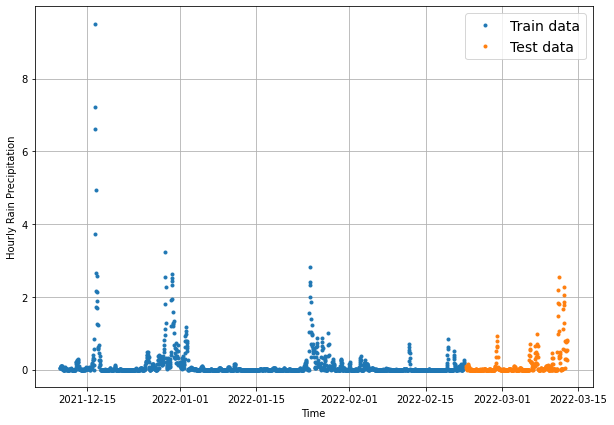

In [26]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_time_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_time_test, values=y_test, label="Test data")

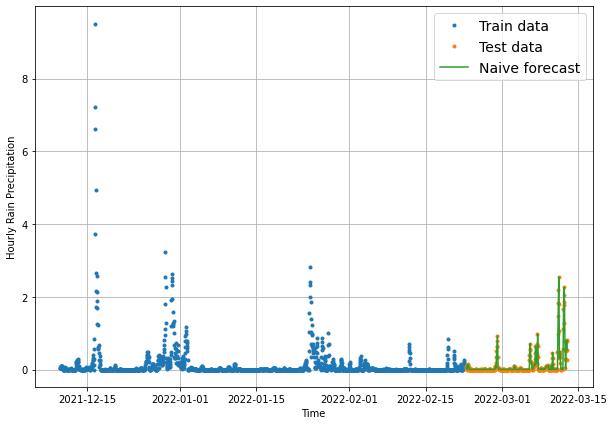

In [27]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_time_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_time_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-", label="Naive forecast");

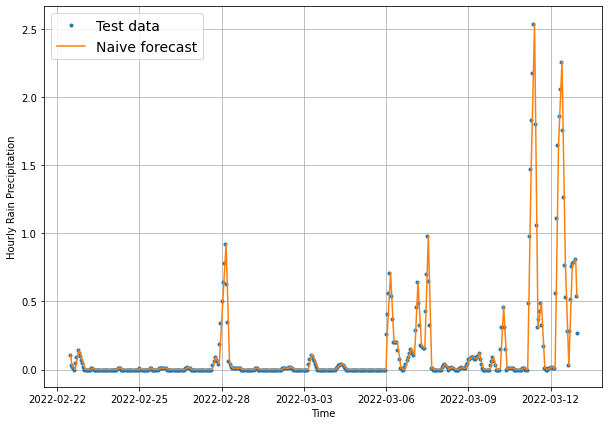

In [68]:
plt.figure(figsize=(10, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-",  label="Naive forecast")
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3));

In [29]:
import tensorflow as tf
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  # train_mae = tf.keras.metrics.mean_absolute_error(y_train, )
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),}

In [30]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 0.04518018, 'mape': 945981.6, 'mse': 0.014906307, 'rmse': 0.12209138}

### RandomForestRegressor

In [31]:
# Reducing data using max_samples
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
model = RandomForestRegressor(
    n_jobs=-1,
    # random_state=42,
    # max_samples=10000, #minimizes the data
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1780, 26), (1780,), (445, 26), (445,))

In [33]:
from tensorflow.python.ops.gen_math_ops import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def show_scores_sklearn(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test) 

    train_mae =  mean_absolute_error(y_train, train_preds)
    mae = mean_absolute_error(y_test, val_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    mse = mean_squared_error(y_test, val_preds)
    train_rmse = sqrt(train_mse)
    rmse = sqrt(mse)
    train_mape = mean_absolute_percentage_error(y_train, train_preds)
    mape = mean_absolute_percentage_error(y_test, val_preds)
    return {"mae": mae,
            "train_mae": train_mae,
          "mse": mse,
          "train_mse": train_mse,
          "rmse": rmse.numpy(),
          "train_rmse": train_rmse.numpy(),
          "mape": mape,
          "train_mape": train_mape
          }

# Score model
random_forest = show_scores_sklearn(model)
random_forest

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.06955618003358163,
 'mape': 9232885092698.127,
 'mse': 0.07370498652583271,
 'rmse': 0.27148662310661403,
 'train_mae': 0.013391067268128056,
 'train_mape': 2731003017502.7065,
 'train_mse': 0.005059856548456256,
 'train_rmse': 0.07113266864427523}

In [34]:
model.score(X_train, y_train), model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.9766697202125416, 0.35717654813822564)

In [35]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_test) 

mean_absolute_error(y_test, val_preds)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.06955618003358163

In [36]:
naive_results

{'mae': 0.04518018, 'mape': 945981.6, 'mse': 0.014906307, 'rmse': 0.12209138}

#### Parameter Tuning

In [37]:


from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto'],
    'max_samples': [332]
}

np.random.seed(42)
#instantiate ranomdized search cv model
rs_model = RandomizedSearchCV(
    RandomForestRegressor(
        n_jobs=-1,
    ),
    param_distributions=rf_grid,
    n_iter=30,
    cv=5,
    verbose=True
)

#Fit the randomized search cv model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [332],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [38]:
rs_model.score(X_train, y_train), rs_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.7030841652515386, 0.8676165031463232)

In [39]:
random_forest_ideal = show_scores_sklearn(rs_model)
random_forest_ideal

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.04631440361023108,
 'mape': 10350898677880.49,
 'mse': 0.01517885482177612,
 'rmse': 0.12320249519297943,
 'train_mae': 0.04255888081104082,
 'train_mape': 10020881167119.785,
 'train_mse': 0.06439492129879974,
 'train_rmse': 0.2537615441685358}

In [40]:
mae = []
mape = []
mse = []
rmse = []

In [41]:
mae.append(naive_results['mae'])
mae.append(random_forest['mae'])
mae.append(random_forest_ideal['mae'])

mape.append(naive_results['mape'])
mape.append(random_forest['mape'])
mape.append(random_forest_ideal['mape'])

mse.append(naive_results['mse'])
mse.append(random_forest['mse'])
mse.append(random_forest_ideal['mse'])

rmse.append(naive_results['rmse'])
rmse.append(random_forest['rmse'])
rmse.append(random_forest_ideal['rmse'])

In [42]:
models = []

In [43]:
models.append('Naive')
models.append('Random Forest')
models.append('Random Forest Randomized Search')

In [44]:
scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.045180,9.459816e+05,0.014906,0.122091
1,Random Forest,0.069556,9.232885e+12,0.073705,0.271487
2,Random Forest Randomized Search,0.046314,1.035090e+13,0.015179,0.123202


### KNeighboursRegressor


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
np.random.seed(42)
k_model = KNeighborsRegressor(
    n_jobs=-1,
    #n_neighbors=2,
    # random_state=42,
    # max_samples=10000, #minimizes the data
)

# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)
k_model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [ ]:
k_model.score(X_train, y_train), k_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.5127933546754293, -0.3612531479232701)

In [ ]:
k_scores = show_scores_sklearn(k_model)
k_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.46554285,
 'mape': 11666468000000.0,
 'mse': 0.64672613,
 'rmse': 0.80419284,
 'train_mae': 0.11971635,
 'train_mape': 123069520000000.0,
 'train_mse': 0.29787284,
 'train_rmse': 0.54577726}

In [ ]:
rf_k_params = {
    'n_neighbors': [1, 3, 5, 10, 20],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50, 60]
}

np.random.seed(42)
rs_k_model = RandomizedSearchCV(
    KNeighborsRegressor(
        n_jobs=-1,
        #random_state=42,
    ),
    param_distributions=rf_k_params,
    n_iter=30,
    cv=5,
    verbose=True
)

#Fit the randomized search cv model
rs_k_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_iter=30,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 30, 40, 50, 60],
                                        'n_neighbors': [1, 3, 5, 10, 20]},
                   verbose=True)

In [ ]:
rs_k_model.score(X_train, y_train), rs_k_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.18966865124343713, -0.2552710866570096)

In [ ]:
knr_ideal = show_scores_sklearn(rs_k_model)
knr_ideal

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.43633336,
 'mape': 12953209000000.0,
 'mse': 0.59637445,
 'rmse': 0.77225286,
 'train_mae': 0.17568868,
 'train_mape': 178758250000000.0,
 'train_mse': 0.4954278,
 'train_rmse': 0.7038663}

In [ ]:
models.append('KNeighboursRegressor')
models.append('KNeighboursRegressor Randomized Search')

mae.append(k_scores['mae'])
mape.append(k_scores['mape'])
mse.append(k_scores['mse']) 
rmse.append(k_scores['rmse'])

mae.append(knr_ideal['mae'])
mape.append(knr_ideal['mape'])
mse.append(knr_ideal['mse']) 
rmse.append(knr_ideal['rmse']) 

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253


### Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
np.random.seed(42)
svr_model = SVR()

# X_train = np.asarray(X_train)|
# y_train = np.asarray(y_train)
svr_model.fit(X_train, y_train)

SVR()

In [ ]:
svr_model.score(X_train, y_train), svr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.0010850874192736004, -0.38572991466620543)

In [ ]:
svr_scores = show_scores_sklearn(svr_model)
svr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.4589229107859985,
 'mape': 21296326374310.56,
 'mse': 0.6583548747787358,
 'rmse': 0.8113907041485845,
 'train_mae': 0.20931614938591062,
 'train_mape': 218761079399186.8,
 'train_mse': 0.6107257476483504,
 'train_rmse': 0.7814894418022232}

In [ ]:
rf_svr_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [1, 3, 5, 7, 9],
    'epsilon': [0.1, 0.3, 0.5, 0.7, 0.9],
    'C': [1, 3, 5, 7, 9], 
}

np.random.seed(42)
rs_svr_model = RandomizedSearchCV(
    SVR(),
    param_distributions=rf_svr_params,
    n_iter=5,
    cv=5,
    verbose=True
)

# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)
#Fit the randomized search cv model
rs_svr_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=5,
                   param_distributions={'C': [1, 3, 5, 7, 9],
                                        'degree': [1, 3, 5, 7, 9],
                                        'epsilon': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=True)

In [ ]:
rs_svr_model.score(X_train, y_train), rs_svr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.0910875115511931, -0.0006375251246413249)

In [ ]:
rs_svr_scores = show_scores_sklearn(rs_svr_model)
rs_svr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.5065153666240702,
 'mape': 121225731427091.22,
 'mse': 0.475398983293958,
 'rmse': 0.6894918297514178,
 'train_mae': 0.5247609076693992,
 'train_mape': 1141505954683854.5,
 'train_mse': 0.5556992413104661,
 'train_rmse': 0.7454523736030801}

In [ ]:
models.append('Support Vector Regression')
models.append('Support Vector Regression Randomized Search')

mae.append(svr_scores['mae'])
mape.append(svr_scores['mape'])
mse.append(svr_scores['mse']) 
rmse.append(svr_scores['rmse'])

mae.append(rs_svr_scores['mae'])
mape.append(rs_svr_scores['mape'])
mse.append(rs_svr_scores['mse']) 
rmse.append(rs_svr_scores['rmse']) 

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253
5,Support Vector Regression,0.458923,2.129633e+13,0.658355,0.811391
6,Support Vector Regression Randomized Search,0.506515,1.212257e+14,0.475399,0.689492


### Ensemble Methods

#### Combining RFR, KNR, and SVR

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
vr_model = VotingRegressor(
    estimators=[
        ('rfr', rs_model),
        ('knr', rs_k_model),
        ('svr', rs_svr_model),
    ]
)

np.random.seed(42)
# X_train_dot = np.dot(X_train, X_train.T)
# X_test_dot = np.dot(X_test, X_train.T)
vr_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


VotingRegressor(estimators=[('rfr',
                             RandomizedSearchCV(cv=5,
                                                estimator=RandomForestRegressor(n_jobs=-1),
                                                n_iter=30,
                                                param_distributions={'max_depth': [None,
                                                                                   3,
                                                                                   5,
                                                                                   10],
                                                                     'max_features': [0.5,
                                                                                      1,
                                                                                      'sqrt',
                                                                                      'auto'],
                                         

In [ ]:
vr_model.score(X_train, y_train), vr_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(0.45308560916830376, 0.2205026491437836)

In [ ]:
vr_scores = show_scores_sklearn(vr_model)
vr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.33417792167128213,
 'mape': 38231150786059.664,
 'mse': 0.3703361494775242,
 'rmse': 0.6085525034682909,
 'train_mae': 0.22501270309944532,
 'train_mape': 409456056008470.94,
 'train_mse': 0.3343775290904336,
 'train_rmse': 0.578253862149172}

In [ ]:
models.append('VotingRegressor')

mae.append(vr_scores['mae'])
mape.append(vr_scores['mape'])
mse.append(vr_scores['mse']) 
rmse.append(vr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.149135,9.619386e+04,0.070655,0.265810
1,Random Forest,0.247820,1.749970e+12,0.249441,0.499440
2,Random Forest Randomized Search,0.227049,1.045875e+12,0.203688,0.451318
3,KNeighboursRegressor,0.465543,1.166647e+13,0.646726,0.804193
4,KNeighboursRegressor Randomized Search,0.436333,1.295321e+13,0.596374,0.772253
5,Support Vector Regression,0.458923,2.129633e+13,0.658355,0.811391
6,Support Vector Regression Randomized Search,0.506515,1.212257e+14,0.475399,0.689492
7,VotingRegressor,0.334178,3.823115e+13,0.370336,0.608553


#### GradientTreeBoosting Regressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [46]:
np.random.seed(42)
gbr_model = GradientBoostingRegressor()

gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [47]:
gbr_scores = show_scores_sklearn(gbr_model)
gbr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.11745853656259707,
 'mape': 22903107088069.78,
 'mse': 0.2976483567961737,
 'rmse': 0.5455715872332189,
 'train_mae': 0.015042205046049757,
 'train_mape': 9785101017735.39,
 'train_mse': 0.0010882982755725072,
 'train_rmse': 0.032989366098373385}

In [48]:
models.append('GradientTreeBoosting Regressor')

mae.append(gbr_scores['mae'])
mape.append(gbr_scores['mape'])
mse.append(gbr_scores['mse']) 
rmse.append(gbr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.045180,9.459816e+05,0.014906,0.122091
1,Random Forest,0.069556,9.232885e+12,0.073705,0.271487
2,Random Forest Randomized Search,0.046314,1.035090e+13,0.015179,0.123202
3,GradientTreeBoosting Regressor,0.117459,2.290311e+13,0.297648,0.545572


In [49]:
np.random.seed(42)
rf_gbr_params = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'n_estimators': [100, 200, 400, 800, 1000, 1600],
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1, 3, 5, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'learning_rate': [0.1, 0.001, 0.005, 0.0001]
}

rs_gbr_model = RandomizedSearchCV(
    GradientBoostingRegressor(),
    param_distributions=rf_gbr_params,
    n_iter=5,
    cv=5,
    verbose=True
)

#Fit the randomized search cv model
rs_gbr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1859: FutureWarning: criterion='mae' was deprecated in 

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=5,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error',
                                                      'absolute_error'],
                                        'learning_rate': [0.1, 0.001, 0.005,
                                                          0.0001],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 3, 5, 10, 20, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'n_estimators': [100, 200, 400, 8

In [50]:
rs_gbr_scores = show_scores_sklearn(rs_gbr_model)
rs_gbr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.04678611231244994,
 'mape': 13920706391914.023,
 'mse': 0.014122946585277952,
 'rmse': 0.1188400041453969,
 'train_mae': 0.02458010901753275,
 'train_mape': 1419224660732.6826,
 'train_mse': 0.055801426447456254,
 'train_rmse': 0.23622325551786016}

In [51]:
models.append('GradientTreeBoosting Regressor Randomized Search')

mae.append(rs_gbr_scores['mae'])
mape.append(rs_gbr_scores['mape'])
mse.append(rs_gbr_scores['mse']) 
rmse.append(rs_gbr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.045180,9.459816e+05,0.014906,0.122091
1,Random Forest,0.069556,9.232885e+12,0.073705,0.271487
2,Random Forest Randomized Search,0.046314,1.035090e+13,0.015179,0.123202
3,GradientTreeBoosting Regressor,0.117459,2.290311e+13,0.297648,0.545572
4,GradientTreeBoosting Regressor Randomized Search,0.046786,1.392071e+13,0.014123,0.118840


### Plotting best model evaluations

In [52]:
# Plot forecasts
rs_forecast = model.predict(X_test)
rs_ideal_forecast = rs_model.predict(X_test)
# k_forecast = k_model.predict(X_test)
# rs_k_forecast = rs_k_model.predict(X_test)
# svr_forecast = svr_model.predict(X_test)
# rs_svr_forecast = rs_svr_model.predict(X_test) 
# vr_forecast = vr_model.predict(X_test)
gbr_forecast = gbr_model.predict(X_test)
rs_gbr_forecast = rs_gbr_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


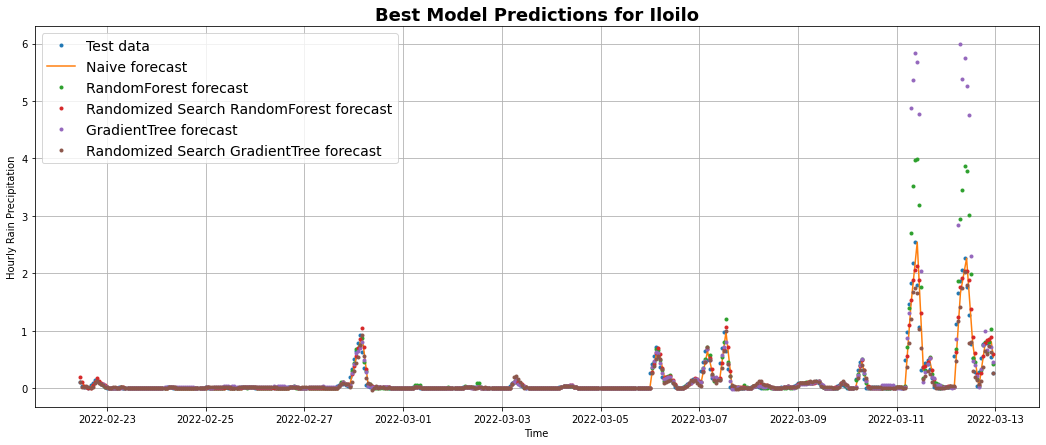

In [53]:
plt.figure(figsize=(18, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-",  label="Naive forecast")
plot_time_series(timesteps=X_time_test, start=offset, values=rs_forecast, label='RandomForest forecast')
plot_time_series(timesteps=X_time_test,  values=rs_ideal_forecast, label='Randomized Search RandomForest forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=k_forecast, label='KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_k_forecast, label='Ideal KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=svr_forecast, label='SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_svr_forecast, label='Ideal SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=vr_forecast, label='VotingRegressor forecast')
plot_time_series(timesteps=X_time_test, start=offset, values=gbr_forecast, label='GradientTree forecast')
plot_time_series(timesteps=X_time_test, values=rs_gbr_forecast, label='Randomized Search GradientTree forecast')
plt.title('Best Model Predictions for Iloilo', fontsize=18, fontweight='bold')

plt.show();

 ### Feature importance

In [54]:
rs_model.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'max_samples': 332,
 'min_samples_leaf': 3,
 'min_samples_split': 18,
 'n_estimators': 70}

In [55]:
# best_rs_model = RandomForestRegressor(
#     n_jobs=-1,
#     max_depth=30,
#     max_features='auto',
#     max_samples=416,
#     min_samples_leaf=10,
#     min_samples_split=40,
#     n_estimators=200
# )

# best_rs_model.fit(X_train, y_train)
np.random.seed(1)
best_rs_model = RandomForestRegressor(
    n_jobs=-1,
    max_depth=None,
    max_features='auto',
    max_samples=416,
    min_samples_leaf=2,
    min_samples_split=20,
    n_estimators=31
)

best_rs_model.fit(X_train, y_train)

RandomForestRegressor(max_samples=416, min_samples_leaf=2, min_samples_split=20,
                      n_estimators=31, n_jobs=-1)

In [71]:
np.random.seed(1)
best_gbr_model = GradientBoostingRegressor(
    criterion='friedman_mse',
    learning_rate=0.1,
    loss='absolute_error',
    max_depth=50,
    max_features='auto',
    min_samples_leaf=20,
    n_estimators=1800,
)

best_gbr_model.fit(X_train, y_train)

best_gbr_scores = show_scores_sklearn(best_gbr_model)
best_gbr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.0320551928430398,
 'mape': 3564220814498.2944,
 'mse': 0.0076037615623643934,
 'rmse': 0.08719955024175523,
 'train_mae': 0.01922076701404476,
 'train_mape': 366365422191.3487,
 'train_mse': 0.05018308655945357,
 'train_rmse': 0.2240158176545879}

In [72]:
models.append('GradientTreeBoosting Regressor Manually Tuned')

mae.append(best_gbr_scores['mae'])
mape.append(best_gbr_scores['mape'])
mse.append(best_gbr_scores['mse']) 
rmse.append(best_gbr_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.045180,9.459816e+05,0.014906,0.122091
1,Random Forest,0.069556,9.232885e+12,0.073705,0.271487
2,Random Forest Randomized Search,0.046314,1.035090e+13,0.015179,0.123202
3,GradientTreeBoosting Regressor,0.117459,2.290311e+13,0.297648,0.545572
4,GradientTreeBoosting Regressor Randomized Search,0.046786,1.392071e+13,0.014123,0.118840
5,Random Forest Manually Tuned,0.045354,1.043159e+13,0.016070,0.126769
6,GradientTreeBoosting Regressor Manually Tuned,0.032055,3.564221e+12,0.007604,0.087200


In [56]:
best_rs_scores = show_scores_sklearn(best_rs_model)
best_rs_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


{'mae': 0.04535410580508196,
 'mape': 10431588776776.346,
 'mse': 0.016070464234210602,
 'rmse': 0.12676933475494223,
 'train_mae': 0.04191517599297145,
 'train_mape': 9941533834256.146,
 'train_mse': 0.05201037572439168,
 'train_rmse': 0.22805783416579156}

In [57]:
scores

,models,mae,mape,mse,rmse
0,Naive,0.045180,9.459816e+05,0.014906,0.122091
1,Random Forest,0.069556,9.232885e+12,0.073705,0.271487
2,Random Forest Randomized Search,0.046314,1.035090e+13,0.015179,0.123202
3,GradientTreeBoosting Regressor,0.117459,2.290311e+13,0.297648,0.545572
4,GradientTreeBoosting Regressor Randomized Search,0.046786,1.392071e+13,0.014123,0.118840


In [58]:
models.append('Random Forest Manually Tuned')

mae.append(best_rs_scores['mae'])
mape.append(best_rs_scores['mape'])
mse.append(best_rs_scores['mse']) 
rmse.append(best_rs_scores['rmse'])

scores = pd.DataFrame(
    data={
        'models': models,
        'mae': mae,
        'mape': mape,
        'mse': mse,
        'rmse': rmse,
    }    
)

scores

,models,mae,mape,mse,rmse
0,Naive,0.045180,9.459816e+05,0.014906,0.122091
1,Random Forest,0.069556,9.232885e+12,0.073705,0.271487
2,Random Forest Randomized Search,0.046314,1.035090e+13,0.015179,0.123202
3,GradientTreeBoosting Regressor,0.117459,2.290311e+13,0.297648,0.545572
4,GradientTreeBoosting Regressor Randomized Search,0.046786,1.392071e+13,0.014123,0.118840
5,Random Forest Manually Tuned,0.045354,1.043159e+13,0.016070,0.126769


In [59]:
best_rs_forecast = best_rs_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [73]:
best_gbr_forecast = best_gbr_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


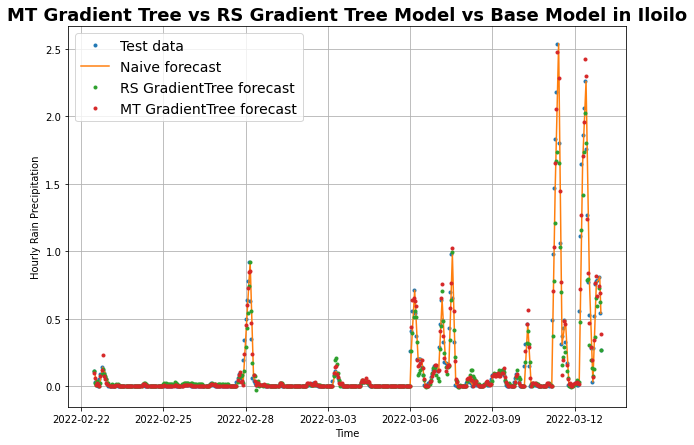

In [75]:
plt.figure(figsize=(10, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-",  label="Naive forecast")
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_ideal_forecast, label='RS RandomForest forecast')
# plot_time_series(timesteps=X_time_test,  values=best_rs_forecast, label='Manually Tuned RandomForest forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=k_forecast, label='KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_k_forecast, label='Ideal KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=svr_forecast, label='SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_svr_forecast, label='Ideal SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=vr_forecast, label='VotingRegressor forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=gbr_forecast, label='GradientTree forecast')
plot_time_series(timesteps=X_time_test, values=rs_gbr_forecast, label='RS GradientTree forecast')
plot_time_series(timesteps=X_time_test, values=best_gbr_forecast, label='MT GradientTree forecast')
# plot_time_series(timesteps=X_time_test, values=best_rs_forecast, label='Best RandomForest forecast')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3));
plt.title('MT Gradient Tree vs RS Gradient Tree Model vs Base Model in Iloilo', fontsize=18, fontweight='bold')

plt.show();

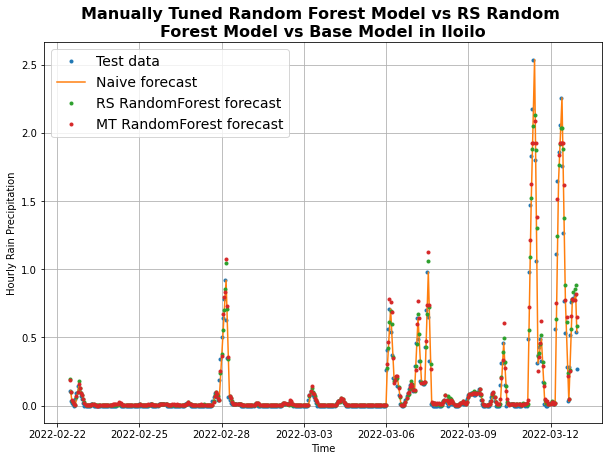

In [66]:
plt.figure(figsize=(10, 7))
offset = 10 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_time_test,  values=y_test, label="Test data")
plot_time_series(timesteps=X_time_test[1:], values=naive_forecast, format="-",  label="Naive forecast")
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_forecast, label='RandomForest forecast')
plot_time_series(timesteps=X_time_test,  values=rs_ideal_forecast, label='RS RandomForest forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=k_forecast, label='KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_k_forecast, label='Ideal KNR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=svr_forecast, label='SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=rs_svr_forecast, label='Ideal SVR forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=vr_forecast, label='VotingRegressor forecast')
# plot_time_series(timesteps=X_time_test, start=offset, values=gbr_forecast, label='GradientTree forecast')
# plot_time_series(timesteps=X_time_test, values=rs_gbr_forecast, label='Randomized Search GradientTree forecast')
plot_time_series(timesteps=X_time_test, values=best_rs_forecast, label='MT RandomForest forecast')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3));
plt.title('Manually Tuned Random Forest Model vs RS Random \nForest Model vs Base Model in Iloilo', fontsize=16, fontweight='bold')

plt.show();

In [62]:
best_rs_model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.13627925e-04, 0.00000000e+00, 2.43764883e-05, 8.25244100e-05,
       2.42043934e-04, 1.33939498e-03, 5.09103985e-02, 9.31027144e-05,
       2.06751496e-04, 2.03573496e-04, 4.69106066e-05, 2.06062682e-05,
       2.15931498e-04, 1.44864757e-03, 6.10598829e-05, 8.83480282e-01,
       2.77391225e-02, 2.64781020e-02, 6.72865182e-03, 1.09722905e-04,
       1.08019982e-05, 1.44366902e-04])

In [63]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({
        'features': columns,
        'feature_importances': importances
    }).sort_values('feature_importances', ascending=False).reset_index(drop=True))

    #plot df
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()
    plt.title('Feature Importance in Iloilo', fontweight='bold', fontsize=14)

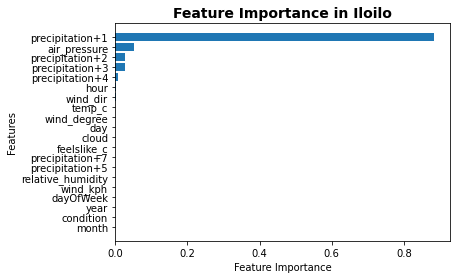

In [64]:
plot_features(X_columns, best_rs_model.feature_importances_)

In [65]:
scores

,models,mae,mape,mse,rmse
0,Naive,0.045180,9.459816e+05,0.014906,0.122091
1,Random Forest,0.069556,9.232885e+12,0.073705,0.271487
2,Random Forest Randomized Search,0.046314,1.035090e+13,0.015179,0.123202
3,GradientTreeBoosting Regressor,0.117459,2.290311e+13,0.297648,0.545572
4,GradientTreeBoosting Regressor Randomized Search,0.046786,1.392071e+13,0.014123,0.118840
5,Random Forest Manually Tuned,0.045354,1.043159e+13,0.016070,0.126769
